This code sets up a Python environment for machine learning and data analysis. It imports libraries for machine learning models (e.g., Random Forest, Decision Tree, and Linear Regression), data processing (e.g., Pandas), and visualization (e.g., Matplotlib, Seaborn). It also has capabilities to partition data into training and testing sets, evaluate models (RMSE, R2), and perform preprocessing (scaling, label encoding). Regression and analysis activities in a Colab notebook are made possible by the Google Drive interface, which makes it possible to access datasets saved in the cloud.

In [61]:
# Import lib.
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This code loads a CSV file with vehicle information into a Pandas DataFrame called data from the given folder in Google Drive. The dataset is loaded with the pd.read_csv() method.The head() function provides a summary of the dataset's structure and contents by displaying the first five rows.

In [62]:
data = pd.read_csv("/content/drive/MyDrive/ML_SUMMATIVE/CAR_DETAILS_FROM_CAR_DEKHO.csv")
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


Using data.info(), this code examines the dataset to show its structure and illustrates how characteristics relate to the target variable (selling_price). The impact of km_driven on the selling price is displayed in a scatter plot, and the distribution of selling_price among fuel types is compared in a boxplot. The visualizations are prepared for clarity using the proper names, labels, and space.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


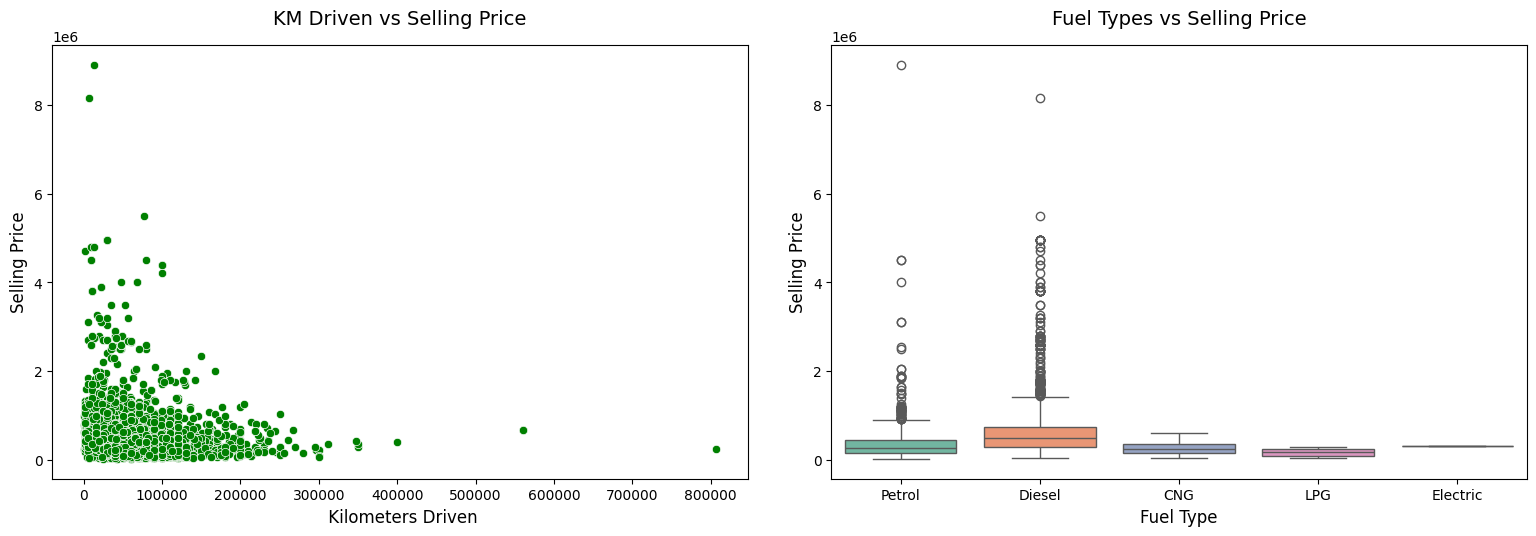

In [63]:
# Inspect the data
data.info()

# visualize the variation of features with respect to the target

# Set the figure size
plt.figure(figsize=(16, 6))

# Plot 1: Scatter plot for km_driven vs selling_price
plt.subplot(1, 2, 1)
sns.scatterplot(x='km_driven', y='selling_price', data=data, color='green', marker='o')
plt.title('KM Driven vs Selling Price', fontsize=14, pad=15)
plt.xlabel(' Kilometers Driven', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)

# Plot 2: Boxplot for fuel vs normalized selling_price
plt.subplot(1, 2, 2)
sns.boxplot(x='fuel', y='selling_price', hue='fuel', data=data, palette='Set2', dodge=False)
plt.title('Fuel Types vs Selling Price', fontsize=14, pad=15)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)

# Adjust layout to improve spacing between plots
plt.tight_layout(pad=3.0)
plt.show()


This code determines the car's age using the current year and the data in the year column, creating a new column called vehicle_age. The current year is subtracted from the year the car was manufactured (datetime.now().year). The vehicle_age column has been added for improved interpretability, and the first five rows of the new dataset are shown using the data.head() method.

In [64]:
# Instead of using the year column, we can use the age of the car for better interpretability
data['vehicle_age'] = datetime.now().year - data['year']
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,vehicle_age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,17
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,17
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,12
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,7
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,10


The owner, seller_type, and year columns are removed from the dataset by this code since they are deemed useless for the study. Changes are done immediately to the data DataFrame without making a copy thanks to the inplace=True argument. Following the elimination of these columns, the data.head() function shows the top five rows of the modified dataset.

In [65]:
# dropping non valuable columns
data.drop(columns=['owner', 'seller_type', 'year'], inplace=True)
data.head()

,name,selling_price,km_driven,fuel,transmission,vehicle_age
0,Maruti 800 AC,60000,70000,Petrol,Manual,17
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Manual,17
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Manual,12
3,Datsun RediGO T Option,250000,46000,Petrol,Manual,7
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Manual,10


To see how the dataset's numerical properties relate to one another, this code creates a correlation heatmap. Initially, it uses data.select_dtypes() to choose the columns that have numerical data types (int64 and float64). Next, it uses sns.heatmap() to plot the heatmap and.corr() to compute the correlation matrix. Annot=True shows the correlation values on the plot, and cmap='coolwarm' applies a color scheme. The heatmap is finally shown with plt.show().

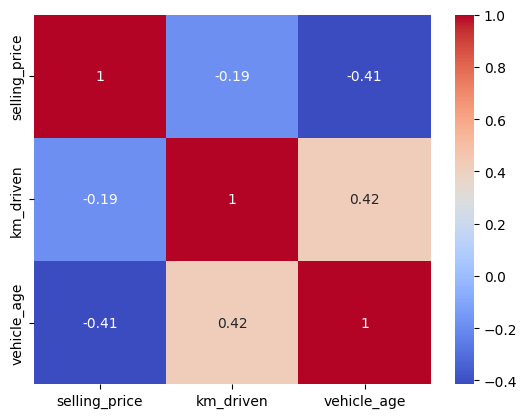

In [66]:
# plotting a correlation heatmap
num_data = data.select_dtypes('int64', 'float64')
sns.heatmap(num_data.corr(), annot=True, cmap='coolwarm')
plt.show()

Since the transmission column is deemed redundant, it is removed from the dataset using this code. Without making a fresh copy, the inplace=True argument guarantees that the column is taken out of the data DataFrame directly. The top five rows of the revised dataset, which now include the transmission column removed, are then shown via the data.head() function.

In [67]:
# dropping redudant features
data.drop(columns=['transmission'], inplace=True)
data.head()

,name,selling_price,km_driven,fuel,vehicle_age
0,Maruti 800 AC,60000,70000,Petrol,17
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,17
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,12
3,Datsun RediGO T Option,250000,46000,Petrol,7
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,10


The name and fuel of the category columns are converted into numerical values by this code using LabelEncoder. The categorical values in each column of the categorical_cols list are transformed into integers using the fit_transform() function, and the encoded values are then saved in the dataset in new columns called encodedname and encodedfuel. Next, the updated dataset's top 10 rows—including the recently encoded columns—are shown using the data.head(10) function.

In [68]:
# Initialize the encoding dictionary
encoding = {}

# Assuming 'data' is your DataFrame
categorical_cols = ['name', 'fuel']

# Encoding the categorical features
le = LabelEncoder()
for col in categorical_cols:
    data['encoded_' + col] = le.fit_transform(data[col])
    encoding[col] = le  # Save the LabelEncoder for each column

# Save the encoder
with open('encoding.pkl', 'wb') as f:
    pickle.dump(encoding, f)

Because the fuel and name of the original category columns have already been converted to numerical values, this code removes them from the dataset. Direct modification of the data DataFrame is guaranteed by the inplace=True argument. Following the elimination of these columns, the data.head() function shows the top five rows of the modified dataset.

In [69]:
# dropping the categorical features
data.drop(columns=['name', 'fuel'], inplace=True)
data.head()

,selling_price,km_driven,vehicle_age,encoded_name,encoded_fuel
0,60000,70000,17,775,4
1,135000,50000,17,1041,4
2,600000,100000,12,505,1
3,250000,46000,7,118,4
4,450000,141000,10,279,1


The dataset is divided into the target variable (y) and features (X) by this code. With the exception of selling_price, which is discarded using data, all columns are included in the X variable.drop(columns=['selling_price']), whereas y has the selling_price column, which is the prediction objective. This division gets the data ready for training the model.



In [70]:
# splitting the data
X = data.drop(columns=['selling_price'])
y = data['selling_price']


This code uses train_test_split to divide the dataset into training and testing sets. The target variable (y) and features (X) are split into two sets: 20% for testing (X_test, y_test) and 80% for training (X_train, y_train). Through the use of a predefined seed for randomization, random_state=42 guarantees repeatability. The data is now ready for model assessment and training.



In [71]:
# Splitting the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Three machine learning models are constructed and trained by this code: Decision Tree Regressor, Random Forest Regressor, and Linear Regression. Each model is trained using the training data (X_train and y_train) using the fit() function once the models have been configured with their corresponding classes. Every model will be prepared to predict on fresh data following training.

In [72]:
# Building and training the model
linear_reg = LinearRegression()
random_forest = RandomForestRegressor()
decision_tree = DecisionTreeRegressor()
linear_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

This function determines the Root Mean Squared Error (RMSE) for each model's predictions on the training set. It assesses how well each model—Random Forest, Decision Tree, and Linear Regression—fits the training set using the root_mean_squared_error function. The RMSE is calculated by comparing the model's predictions (linear_reg.predict(X_train), random_forest.predict(X_train), and decision_tree.predict(X_train)) with the actual target values (y_train). The performance of each model on the training data is then indicated by the RMSE values that are printed for each model.

In [73]:
# calculating the training rsmes
linear_reg_train_rmse = root_mean_squared_error(y_train, linear_reg.predict(X_train))
random_forest_train_rmse = root_mean_squared_error(y_train, random_forest.predict(X_train))
decision_tree_train_rmse = root_mean_squared_error(y_train, decision_tree.predict(X_train))
print("Training RMSE for Linear Regression:", linear_reg_train_rmse)
print("Training RMSE for Random Forest:", random_forest_train_rmse)
print("Training RMSE for Decision Tree:", decision_tree_train_rmse)

Training RMSE for Linear Regression: 509802.7152309405
Training RMSE for Random Forest: 96949.79258982107
Training RMSE for Decision Tree: 8669.951468636373


This function determines the Root Mean Squared Error (RMSE) for each model's test set predictions. It does a comparison between the predicted values from each model (linear_reg.predict(X_test), random_forest.predict(X_test), and decision_tree.predict(X_test)) and the actual target values (y_test). The accuracy with which the model predicts the test data is measured using the root_mean_squared_error function. The performance of each model on unseen data is then indicated by printing the RMSE values.

In [74]:
# calculating the test rsmes
linear_reg_test_rmse = root_mean_squared_error(y_test, linear_reg.predict(X_test))
random_forest_test_rmse = root_mean_squared_error(y_test, random_forest.predict(X_test))
decision_tree_test_rmse = root_mean_squared_error(y_test, decision_tree.predict(X_test))
print("Test RMSE for Linear Regression:", linear_reg_test_rmse)
print("Test RMSE for Random Forest:", random_forest_test_rmse)
print("Test RMSE for Decision Tree:", decision_tree_test_rmse)

Test RMSE for Linear Regression: 486738.8534724138
Test RMSE for Random Forest: 293384.8614194943
Test RMSE for Decision Tree: 354783.2329985207


This function determines the r2_score for each of the test set's models (Decision Tree, Random Forest, and Linear Regression). The percentage of the target variable's (y_test) variation that can be accounted for by the model's predictions is shown by the r2_score, which is calculated using the r2_score function. The model fits the test data better when the R2 value is larger. In order to assess each model's prediction performance on the test data, the R2 scores are printed.

In [75]:
# calculating r2_scores
linear_reg_r2 = r2_score(y_test, linear_reg.predict(X_test))
random_forest_r2 = r2_score(y_test, random_forest.predict(X_test))
decision_tree_r2 = r2_score(y_test, decision_tree.predict(X_test))
print("R2 Score for Linear Regression:", linear_reg_r2)
print("R2 Score for Random Forest:", random_forest_r2)
print("R2 Score for Decision Tree:", decision_tree_r2)

R2 Score for Linear Regression: 0.22366389428229805
R2 Score for Random Forest: 0.7179454198686731
R2 Score for Decision Tree: 0.5875380135076217


In order to compare the actual prices (y_test) with the prices predicted by the Random Forest model, this code generates a scatter plot. With the x-axis representing real prices and the y-axis representing forecasted values, the scatter plot displays the data points. For reference, there is a red dashed line added that represents flawless predictions. The plot's title and suitable axis names are used to illustrate how well the model predicts auto prices.

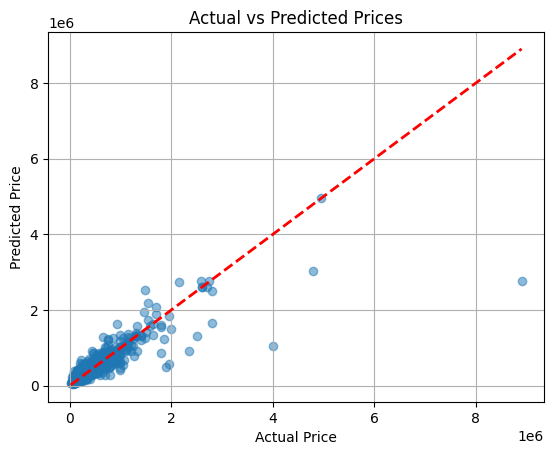

In [76]:
# Plotting the graph of the predicted vs the actual data
predictions = random_forest.predict(X_test)

plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid()
plt.show()

In [77]:
# Saving both model for API purpose
# Saving the actual encoded model
pickle.dump(random_forest, open("random_forest.sav", "wb"))
loaded_model = pickle.load(open("random_forest.sav", "rb"))